<a href="https://colab.research.google.com/github/nghoanglong/bank-customer-churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libaries, Packages và Set Dataset Path

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import seaborn as sns

%matplotlib inline

In [4]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/nghoanglong/bank-customer-churn/main/data/raw_data.csv'
DATASET_DIR_PATH = '/content/drive/MyDrive/Datasets/Data Science Research/IS252' # [directory path] để save dataset trên google drive
DATASET_PATH = os.path.join(DATASET_DIR_PATH, 'customer_churn_raw.csv')

# Download and save dataset

In [ ]:
def fetch_data(download_url, dataset_path):
    try:
        urllib.request.urlretrieve(download_url, dataset_path)
    except:
        print(f"failed to download and save dataset in {dataset_path}")

In [ ]:
fetch_data(DOWNLOAD_URL, DATASET_PATH)

# Data Preprocessing - Hoàng Long

In [5]:
# load dataset
df = pd.read_csv(DATASET_PATH)

In [6]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df.copy()

## EDA - Exploratory Data Analysis

Những thông tin cần biết từ dữ liệu:

1. Dữ liệu bao gồm bao nhiêu hàng, cột?
2. Phân bố dữ liệu của từng feature như thế nào?
3. Tên của các cột đã dể hiểu hay chưa?
4. Phân loại các biến continous và categorical
5. Dữ liệu có chứa NaN hay không?
6. Kiểm tra Outliners?

### Xem thông tin dữ liệu

In [7]:
# kiểm tra 5 dòng đầu
df_cp.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df_cp.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


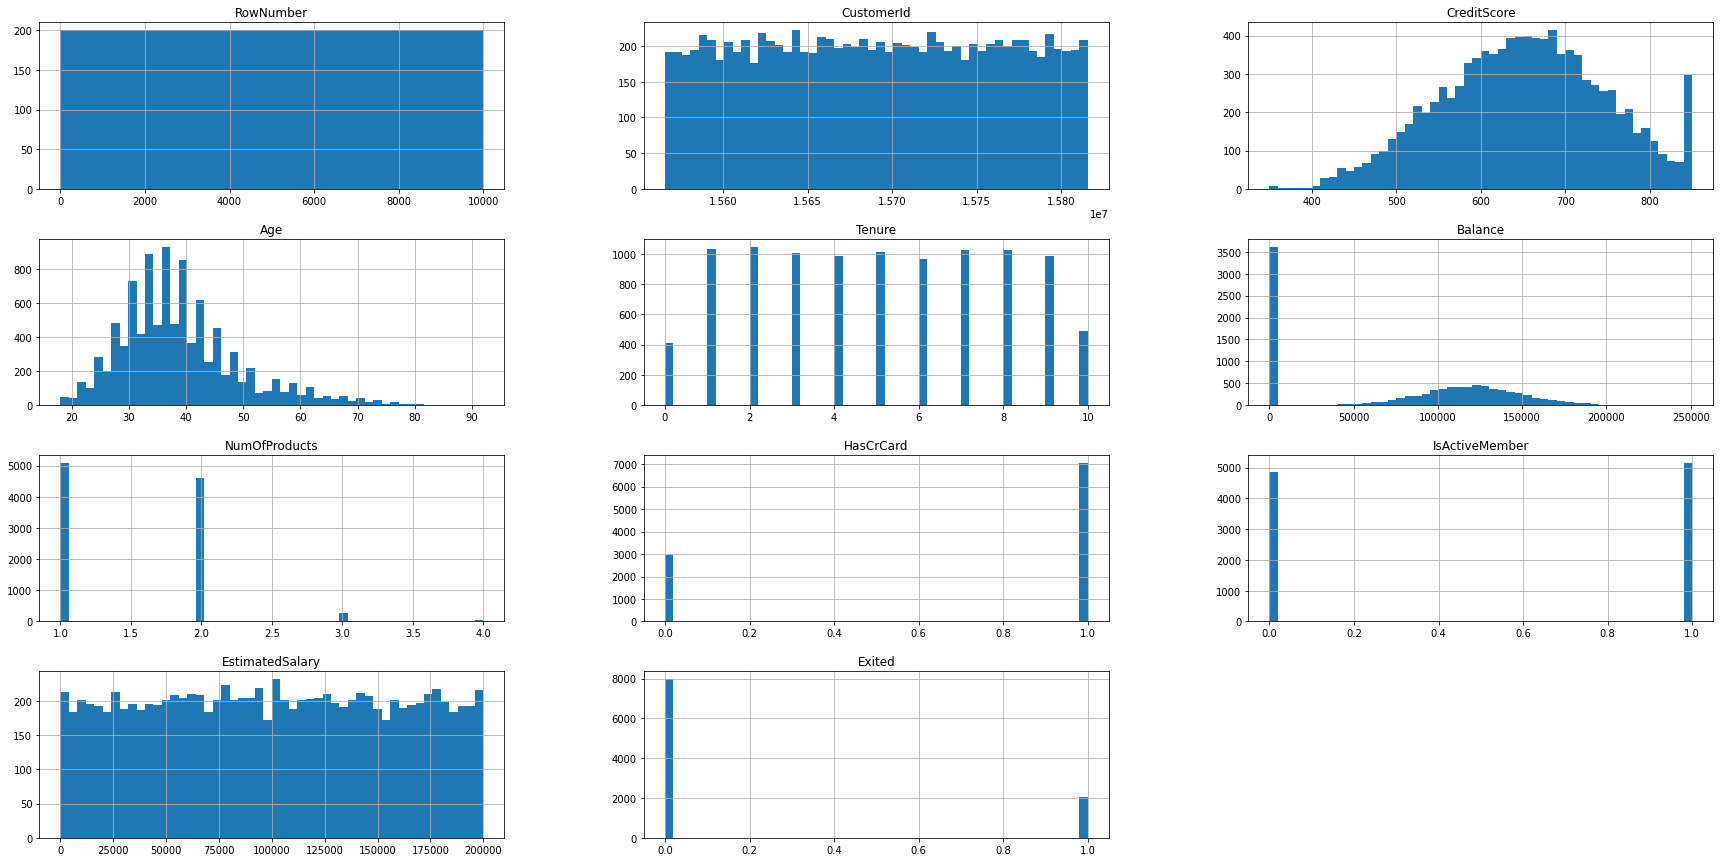

In [10]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(30, 15))
plt.show()

### Kiểm tra giá trị NaN của các features

In [11]:
# check dữ liệu NaN
missing_data = df_cp.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]

In [12]:
missing_data

,features,total_missing
0,RowNumber,0
1,CustomerId,0
2,Surname,0
3,CreditScore,0
4,Geography,0
5,Gender,0
6,Age,0
7,Tenure,0
8,Balance,0
9,NumOfProducts,0


### Kiểm tra Outliers

In [13]:
# Lấy ra những cột dạng numeric trong data
numeric = df_cp.select_dtypes(exclude='object')

In [14]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['RowNumber', 'CustomerId', 'Exited']]
cols_to_check

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

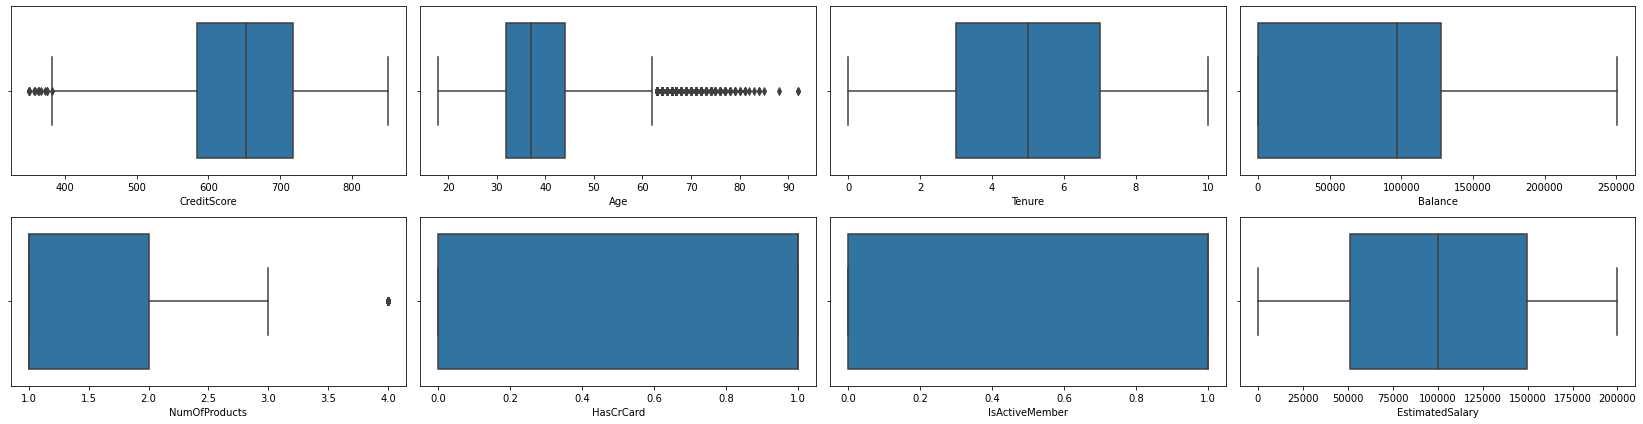

In [15]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(2, 4, figsize = (23, 6))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

### Kết luận

**Dữ liệu bao gồm:** 10000 recors, 14 features

**Tên của các features:** Dễ hiểu, không cần thực hiện thay đổi

**Dữ liệu của các features:** Cần thực hiện thay đổi
1. Geography cần thực hiện encode sang dạng numerical
2. Gender cần thực hiện encode sang dạng numerical

**Ta phân loại được:**

*   **Categorical features:** Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember,
*   **Numerical features:** RowNumber, CustomerId, CreditScore, Age, Balance, EstimatedSalary
*   **Discrete features:** Surname
*   **Label:** Exited

**NaN data:** Các features không chứa NaN data

**Ouliers:** 
1. **CreditScore (Mức tín dụng của khách hàng):** feature chứa outliers nằm trong khoảng [350, 380]
2. **Age (Tuổi của khách hàng):** feature chứa outliers nằm trong khoảng [63, 92]
3. **NumOfProducts (Số dịch vụ khách hàng đã sử dụng):** feature chứa outliers ở điểm 4.0


## Data Cleaning
**Mục tiêu:**


1. Vì các features và kiểu dữ liệu đã chuẩn theo mong muốn -> Không thực hiện xử lý
2. Vì các features không chứa NaN data -> Không thực hiện xử lý
3. Xử lý các Outliers: Sử dụng **IQR (Interquartile Range)**


### Xử lý Outliers sử dụng IQR

In [16]:
# outlier columns
outlier_cols = ["CreditScore", "Age", "NumOfProducts"]

def outlier_thresholds(dataframe, variable):
    Q1 = df_cp[variable].quantile(0.25)
    Q3 = df_cp[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [17]:
df_cp = HandleOutliers(df_cp)

CreditScore has 15 outliers
Age has 359 outliers
NumOfProducts has 58 outliers


In [18]:
# result
df_cp

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Feature Engineering
Mục tiêu:
1. Encode các features dạng text về numerical
2. Feature selection
  *   Sử dụng Chi-squared để kiểm tra mối tương quan giữa input features (categorical) và label (categorical)
  *   Sử dụng Anova F-test để kiểm định mối tương quan giữa input features (continous) và label (categorical)
  *   Ta có thể trực tiếp loại bỏ các features [RowNumber,	CustomerId,	Surname] vì nhận thấy không có mối tương quan giữa những features này với label
3. Apply Data Scaling

### Encode features

In [19]:
# check giá trị Geography feature
df_cp["Geography"].value_counts()

France     4798
Germany    2398
Spain      2372
Name: Geography, dtype: int64

In [20]:
# check giá trị Gender feature
df_cp["Gender"].value_counts()

Male      5236
Female    4332
Name: Gender, dtype: int64

Ta thấy được, với
1. Geography feature có 3 giá trị [France, Germany, Spain] -> tiến hành encode feature này về dạng numerical với giá trị lần lượt [0, 1, 2]
2. Gender feature có 2 giá trị [Male, Female] -> tiến hành encode feature này về dạng numerical với giá trị lần lượt [0, 1]

In [21]:
df_cp['Geography'] = df_cp["Geography"].map({value:idx for idx, value in enumerate(df_cp["Geography"].value_counts().index)})

In [22]:
df_cp['Gender'] = df_cp["Gender"].map({value:idx for idx, value in enumerate(df_cp["Gender"].value_counts().index)})

In [23]:
# results
df_cp.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,0,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,0,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,0,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,0,0,31,6,102016.72,2,0,0,80181.12,0


### Feature Selection

#### Chi-square test
Đặt giả thuyết:

*   Null hypothesis (H0) : output feature không phụ thuộc input feature
*   Alternate hypothesis (H1): output feature có phụ thuộc input feature

Nếu ta chấp nhận giả thuyết H0, tức label không phụ thuộc vào input feature đang xét và ngược lại

Mức alpha xét = 0.05

**Mục tiêu:** lấy ra được những feature có tác động tới output

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
categorical_features = df_cp[["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]]

In [26]:
best_features = SelectKBest(chi2, k=6)
best_features.fit(categorical_features, df_cp["Exited"])

SelectKBest(k=6, score_func=<function chi2 at 0x7f347e6bd680>)

In [27]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
5,1.535910e-23,99.984544,IsActiveMember
1,4.419432e-14,56.972525,Gender
3,1.848108e-06,22.746809,NumOfProducts
0,6.703683e-04,11.569656,Geography
2,7.549423e-02,3.159328,Tenure
4,6.806320e-01,0.169415,HasCrCard


In [28]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0         Geography
1            Gender
3     NumOfProducts
5    IsActiveMember
Name: columns, dtype: object

#### Anova F-test
Đặt giả thuyết:

*   Null hypothesis (H0) : 2 groups có cùng phương sai
*   Alternate hypothesis (H1): 2 groups có phương sai khác nhau

Nếu ta chấp nhận giả thuyết H0, tức input feature hiện tại không ảnh hưởng tới label và ngược lại

Mức alpha xét = 0.05

**Mục tiêu:** lấy ra được những feature có tác động tới output

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

In [30]:
continous_features = df_cp[["CreditScore", "Age", "Balance", "EstimatedSalary"]]

In [31]:
best_features = SelectKBest(f_classif, k=4)
best_features.fit(continous_features , df_cp["Exited"])

SelectKBest(k=4)

In [32]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
1,4.434511e-280,1368.362144,Age
2,1.470548e-29,128.323591,Balance
0,8.426616e-02,2.981256,CreditScore
3,4.008481e-01,0.705844,EstimatedSalary


In [33]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

1        Age
2    Balance
Name: columns, dtype: object

#### Kết luận
Vậy ta chọn được những features sau:
1. input: [Geography, Gender,  NumOfProducts, IsActiveMember, Age, Balance]
2. output: Exited

### Data Scaling
Mục tiêu: Apply Data Normalization lên các continous features [Age, Balance]

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
cols_to_scale = ["Age", "Balance"]
scaler = MinMaxScaler()
df_cp[cols_to_scale] = scaler.fit_transform(df_cp[cols_to_scale])

In [36]:
# result
df_cp[cols_to_scale]

,Age,Balance
0,0.545455,0.000000
1,0.522727,0.334031
2,0.545455,0.636357
3,0.477273,0.000000
4,0.568182,0.500246
...,...,...
9995,0.477273,0.000000
9996,0.386364,0.228657
9997,0.409091,0.000000
9998,0.545455,0.299226


### Final Result

In [37]:
input = df_cp[["Geography", "Gender", "NumOfProducts", "IsActiveMember", "Age", "Balance"]].to_numpy()

In [38]:
input.shape

(9568, 6)

In [39]:
y = df_cp["Exited"].to_numpy()

In [40]:
y.shape

(9568,)

# Xây dựng mô hình

In [76]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Logistic Regression

In [72]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1710)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = logreg.predict(X_test)

In [77]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.822884012539185
              precision    recall  f1-score   support

       leave       0.84      0.96      0.90      1536
        stay       0.63      0.25      0.35       378

    accuracy                           0.82      1914
   macro avg       0.74      0.61      0.63      1914
weighted avg       0.80      0.82      0.79      1914



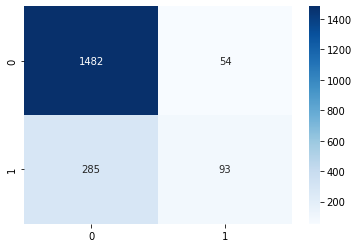

In [80]:
logreg_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(logreg_cm, annot=True, fmt="g", cmap="Blues")

## Decision Trees

In [68]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1711)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [69]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred = clf_gini.predict(X_test)

In [71]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8035527690700105
              precision    recall  f1-score   support

       leave       0.87      0.89      0.88      1536
        stay       0.50      0.46      0.48       378

    accuracy                           0.80      1914
   macro avg       0.69      0.67      0.68      1914
weighted avg       0.80      0.80      0.80      1914



## XGBoost

In [54]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1712)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [58]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier()

In [59]:
y_pred = xgb_classifier.predict(X_test)

In [60]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.8610240334378265
              precision    recall  f1-score   support

       leave       0.88      0.96      0.92      1536
        stay       0.74      0.46      0.56       378

    accuracy                           0.86      1914
   macro avg       0.81      0.71      0.74      1914
weighted avg       0.85      0.86      0.85      1914

